# Importation des librairies

In [1]:
# import os   #cette ligneet celle du dessous sonts sensées trouver la pathing du fichier csv qu'on veut ouvrir avec PANDAS 
# os.getcwd()
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# pd.options.display.max_rows = 10000

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
print(np.__version__)
print(pd.__version__)

1.15.4
0.23.4


# Lecture des données

In [3]:
# Lecture de la data  :

data_0 = pd.read_csv('data/EdStatsData.csv')
data_1 = pd.read_csv('data/EdStatsCountry-Series.csv')
data_2 = pd.read_csv('data/EdStatsCountry.csv')
data_3 = pd.read_csv('data/EdStatsFootNote.csv')
data_4 = pd.read_csv('data/EdStatsSeries.csv')

In [4]:
# fonction pour afficher les valeurs manquantes,pourcentage de tout les fichiers csv

def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['données manquantes', '% DM'])
    
    return missing_data

#Les données manquantes sous forme de tableaux en ordre descendant
all_data = (data_0,data_1,data_2,data_3,data_4)
for i in all_data:
    if i is not None:
        missing_data(i)
    else:
        print("Error")
    

,données manquantes,% DM
Unnamed: 69,886930,100.000000
2017,886787,99.983877
2016,870470,98.144160
1971,851393,95.993258
1973,851385,95.992356
1972,851311,95.984012
1974,851200,95.971497
1979,850121,95.849842
1976,849447,95.773849
1982,849419,95.770692


,données manquantes,% DM
Unnamed: 3,613,100.0
DESCRIPTION,0,0.0
SeriesCode,0,0.0
CountryCode,0,0.0


,données manquantes,% DM
Unnamed: 31,241,100.000000
National accounts reference year,209,86.721992
Alternative conversion factor,194,80.497925
Other groups,183,75.933610
Latest industrial data,134,55.601660
Vital registration complete,130,53.941909
External debt Reporting status,117,48.547718
Latest household survey,100,41.493776
Latest agricultural census,99,41.078838
Lending category,97,40.248963


,données manquantes,% DM
Unnamed: 4,643638,100.0
DESCRIPTION,0,0.0
Year,0,0.0
SeriesCode,0,0.0
CountryCode,0,0.0


,données manquantes,% DM
Unnamed: 20,3665,100.000000
Related indicators,3665,100.000000
Other web links,3665,100.000000
Unit of measure,3665,100.000000
License Type,3665,100.000000
Notes from original source,3665,100.000000
Development relevance,3662,99.918145
General comments,3651,99.618008
Limitations and exceptions,3651,99.618008
Statistical concept and methodology,3642,99.372442


In [5]:
# je Verifie si il y'a des données dupliqués (rows)

for i in all_data:
    i.duplicated().sum()
    
    
# La dimension (Shape) de nos données 
for k in all_data:
    k.shape

0

0

0

0

0

(886930, 70)

(613, 4)

(241, 32)

(643638, 5)

(3665, 21)

# Pré-selection et structuration des données 

In [6]:
# On remarque que l'année 2010 et 2015 sonts les plus remplies et les plus récentes au meme temps.
# ce qui peut etre interessant aussi de voir l'evolution entre l'année 2010 et 2015
data_0.count()

# Selection des data pour l'année 2010 et 2015:

data_principale = data_0.drop(['Unnamed: 69'], axis=1)
data_principale = data_principale.loc[:,['Indicator Name','Indicator Code','Country Name','Country Code','2010','2015']]


#creation d'une colone supplementaire 'Year' et "value" pour avoir l'année et sa valeur separemment pour ensuite faire un DropNan
data_principale = pd.melt(data_principale,id_vars = ['Indicator Code','Indicator Name','Country Name','Country Code',],var_name='Year')

# on drop les indicateurs qui n'ont aucune valeurs renseigné pour cette année, on peut faire cela car on étudie sur une année seulement donc d'autre cas il faudra choisir
# combien de valeurs null qu'on peut se permetrre avec thresh = 
data_principale = data_principale.dropna()

# Pour faciliter l'etude on partage nos données on 2 DataFrame pour les 2 années
data_principale_2010 = data_principale.loc[data_principale['Year']== '2010']
data_principale_2015 = data_principale.loc[data_principale['Year']== '2015']

data_principale_2010.sample(5)

Country Name      886930
Country Code      886930
Indicator Name    886930
Indicator Code    886930
1970               72288
1971               35537
1972               35619
1973               35545
1974               35730
1975               87306
1976               37483
1977               37574
1978               37576
1979               36809
1980               89122
1981               38777
1982               37511
1983               38460
1984               38606
1985               90296
1986               39372
1987               38641
1988               38552
1989               37540
1990              124405
1991               74437
1992               75543
1993               75793
1994               77462
1995              131361
                   ...  
2006              140312
2007              137272
2008              134387
2009              142108
2010              242442
2011              146012
2012              147264
2013              137509
2014              113789


,Indicator Code,Indicator Name,Country Name,Country Code,Year,value
765696,PRJ.MYS.4064.MA,Wittgenstein Projection: Mean years of schooli...,St. Vincent and the Grenadines,VCT,2010,9.40000
684017,SP.TER.TOTL.FE.IN,Population of the official age for tertiary ed...,Rwanda,RWA,2010,563376.00000
232932,SE.SEC.ENRL.VO.ZS,Percentage of students in secondary education ...,Chad,TCD,2010,1.29373
421743,BAR.SCHL.75UP,"Barro-Lee: Average years of total schooling, a...","Iran, Islamic Rep.",IRN,2010,4.37000
654018,UIS.NER.0.GPI,"Net enrolment rate, pre-primary, gender parity...",Peru,PER,2010,1.00420


# Analyse des continents et groupes de pays 

In [7]:
# selection des continents et groupes de pays pour l'analyse :
data_principale_2010_cont = data_principale_2010.loc[data_principale_2010['Country Code'].isin(['ARB','EAS','ECS','EUU','GRB','LCN','MEA','NAC'])]
data_principale_2015_cont = data_principale_2015.loc[data_principale_2015['Country Code'].isin(['ARB','EAS','ECS','EUU','GRB','LCN','MEA','NAC'])]

# visualisation des indicateurs pertinents 
data_principale_2015_cont['Indicator Name'].value_counts()




# selection des indicateurs pertinents selon une fréquence d'apparition elevée et leur utilité dans note analyse
data_principale_2010_cont = data_principale_2010_cont.loc[data_principale_2010_cont['Indicator Code'].isin(['SL.TLF.BASC.ZS','IT.NET.USER.P2','NY.GDP.PCAP.CD','SL.TLF.INTM.ZS','NY.GDP.MKTP.PP.CD'])]
data_principale_2015_cont = data_principale_2015_cont.loc[data_principale_2015_cont['Indicator Code'].isin(['SL.TLF.BASC.ZS','IT.NET.USER.P2','NY.GDP.PCAP.CD','SL.TLF.INTM.ZS','NY.GDP.MKTP.PP.CD'])]



 #je met ensuite les indicateurs en colonnes pour nos 2 tableaux avec un pivot pour mieux visualiser 
data_principale_2010_cont = data_principale_2010_cont.pivot('Country Name',columns='Indicator Name', values='value')
data_principale_2015_cont = data_principale_2015_cont.pivot('Country Name',columns='Indicator Name', values='value')
data_principale_2015_cont = data_principale_2015_cont.reset_index()
data_principale_2010_cont = data_principale_2015_cont.reset_index()
data_principale_2015_cont


Population, ages 15-64 (% of total)                                          7
GDP, PPP (current international $)                                           5
Population, female                                                           5
Population, male                                                             5
Unemployment, male (% of male labor force)                                   5
GDP per capita, PPP (constant 2011 international $)                          5
Labor force, female (% of total labor force)                                 5
GDP at market prices (constant 2005 US$)                                     5
Population, ages 15-64, female                                               5
Population growth (annual %)                                                 5
Mortality rate, under-5 (per 1,000)                                          5
Internet users (per 100 people)                                              5
GNI per capita, Atlas method (current US$)          

Indicator Name,Country Name,GDP per capita (current US$),"GDP, PPP (current international $)",Internet users (per 100 people),Labor force with basic education (% of total),Labor force with intermediate education (% of total)
0,East Asia & Pacific,9541.871089,3.678985e+13,49.787924,NaN,NaN
1,Europe & Central Asia,22442.214808,2.782289e+13,71.162003,36.455690,64.638529
2,Latin America & Caribbean,8650.871589,9.684819e+12,54.279733,NaN,NaN
3,Middle East & North Africa,7336.969933,8.018712e+12,44.231819,NaN,NaN
4,North America,55153.758209,1.970908e+13,75.941036,45.433732,60.104139


Text(0.5, 1.0, "L'accés a internet selon le continent (2015)")

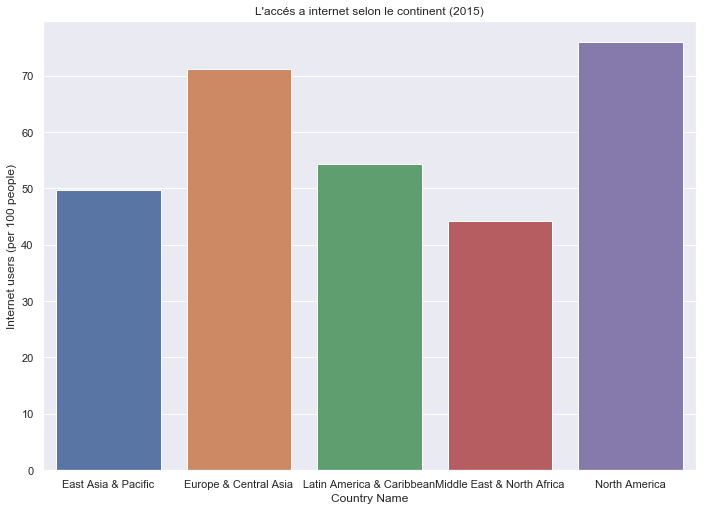

In [8]:
# on plot les continents en fonction du taux d'utilisaiton d'internet 
# il n'ya pas de groupes de pays car on a pas l'information sur les indicateurs choisis.
# on pourrait considerer que au dela de 60% le continent ou le groupe de pays peut etre interessant a cibler
sns.set(rc={'figure.figsize':(11.7,8.27)})

a= sns.barplot(x='Country Name',y='Internet users (per 100 people)',data=data_principale_2010_cont)
plt.title("L'accés a internet selon le continent (2015)")

Text(0.5, 1.0, "L'accés a internet selon le continent (2015)")

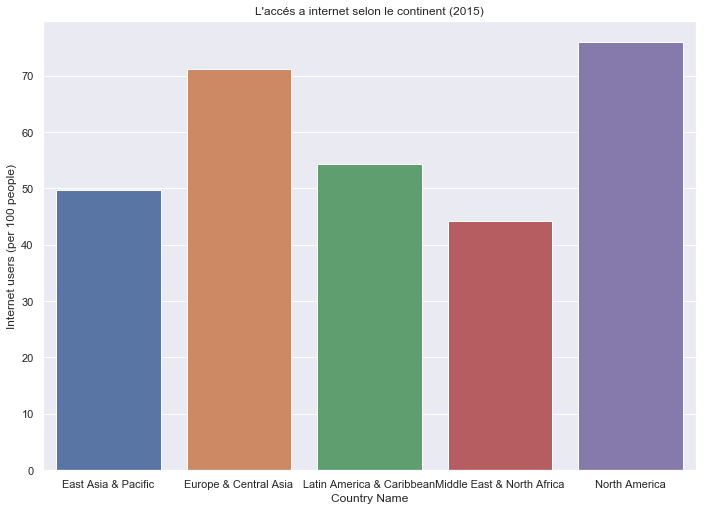

In [9]:
# On voit que pour l'année 2015 on a presque le meme graphique ce qui nous dis aussi que il n'ya pas de reel changement
# malgré les années d'ecart entre 2010 et 2015
r= sns.barplot(x='Country Name',y='Internet users (per 100 people)',data=data_principale_2015_cont)
plt.title("L'accés a internet selon le continent (2015)")

Text(0.5, 1.0, 'Le PIB des continents')

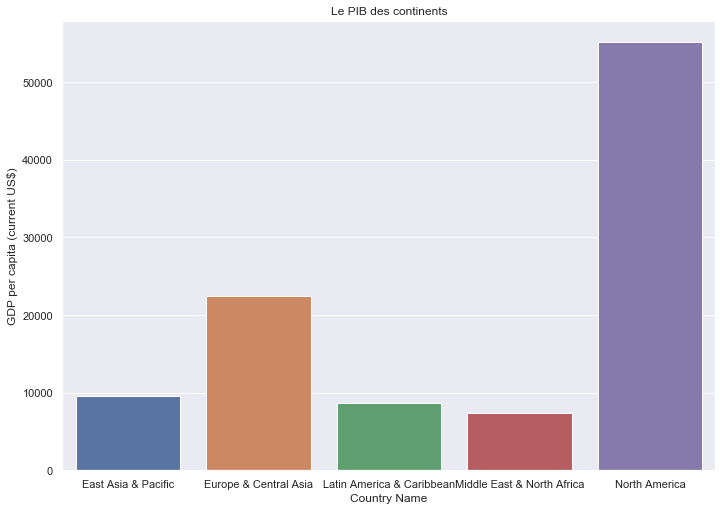

In [10]:
# on visualise maitenant les pays en fonction du PIB et on remarque que l'amerique du nord a un PIB bien plus elevée  ce qui
# peut etre un indicateur pour un eventuel investissement, sans negliger l'europe et l'asie central.

b= sns.barplot(x='Country Name',y='GDP per capita (current US$)',data=data_principale_2015_cont)
plt.title("Le PIB des continents")

# Conclusion pour les continents et groupes de pays 

###  Malgré le manque d'informations sur le niveau d'educations,  ces 2 graphiques nous font remarquer que les 3 continents ou groupes de pays les plus interessants sont : North America, Europe and Central Asia, Latina America, avec un taux d'acces a internet de plus de 70%, et un PIB elevée pour financer les formations en lignes

# Visualisation et Analyse des données pour les pays 

242

Text(0.5, 1.0, "Fréquence d'apparitions des pays")

Text(0.5, 0, 'pays unique')

Text(67.3, 0.5, 'fréquence')

count     242.000000
mean     1001.826446
std       520.573729
min         2.000000
25%       524.250000
50%      1214.000000
75%      1432.250000
max      1901.000000
Name: Country Code, dtype: float64

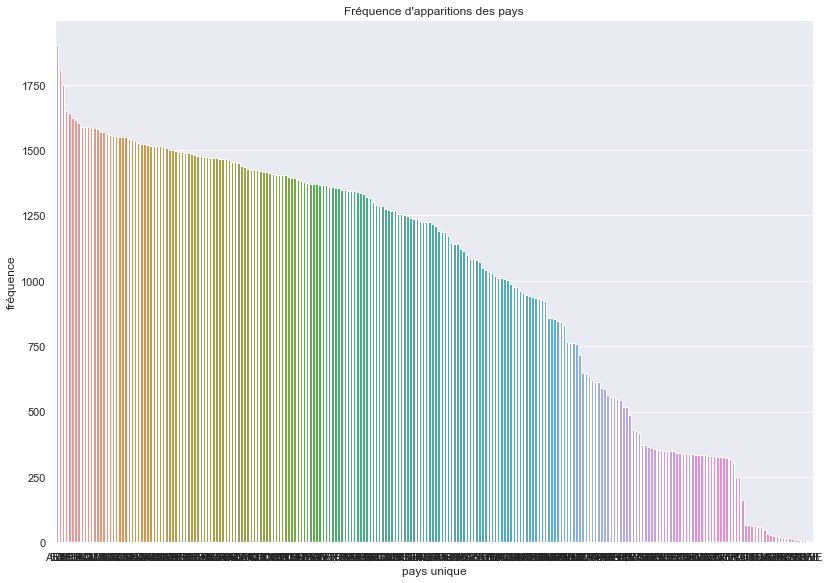

In [11]:

# on voit qu'il ya 242 pays uniques
pays_unique = data_principale_2010['Country Code'].unique()
pays_unique.size

# on plot le graphe pour voir la féquence d'apparition des pays
plt.title("Fréquence d'apparitions des pays") 
beta = data_principale_2010['Country Code'].value_counts()
plt.xlabel("pays unique")

sns.barplot(x=pays_unique,y=beta,data=data_principale_2010)
plt.tight_layout() 
plt.ylabel("fréquence")

# les statistiques descriptives et le graphe nous confirme que 75% des pays ont une fréquence d'apparition elevéé et seulement 25% ont une fréquence faible
# donc on peut se permettre d'enelver les 25% de pays qui ont une faible apparition.
data_principale_2010['Country Code'].value_counts().describe()

#Je choisis donc de prendre seulement les pays avec une fréquence d'apparitions de 500 et plus pour prendre la majeur partie de nos données
test=data_principale_2010.groupby(['Country Code','Country Name']).filter(lambda x: x['Country Code'].size>=600)

In [12]:

# avec ces statistiques on remarque que la pluspart des indicateurs n'ont aucun interet car 50% des indicateurs
# se sont repetés moins de 100 fois (voir le Describe en bas)
test['Indicator Code'].value_counts().describe(percentiles  = [.10, .60, .73])

# Donc je decide de prendre seulements les 20 a 25% restant qui se sont repetés suffisament de fois car les autres on ne pourra de toute facon pas les utiliser,cela est impossible
test=data_principale_2010.groupby('Indicator Code').filter(lambda x: x['Indicator Code'].size>140)

#je visualise ensuite les indicateurs manuellement pour en selectionner quelqu'uns les plus pertinants 
test['Indicator Name'].value_counts()


count    2568.000000
mean       87.294782
std        64.285688
min         1.000000
10%         4.000000
50%        93.000000
60%       129.000000
73%       144.000000
max       174.000000
Name: Indicator Code, dtype: float64

Population growth (annual %)                                                                                               240
Population, total                                                                                                          240
GDP at market prices (current US$)                                                                                         228
GDP per capita (current US$)                                                                                               228
GDP at market prices (constant 2005 US$)                                                                                   227
Internet users (per 100 people)                                                                                            227
GDP per capita (constant 2005 US$)                                                                                         227
Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)    

# Selection des indicateurs pertinents 

Text(0.5, 1.0, "La correlation entre le PIB et l'accés a internet des pays  ")

Indicator Name,"Enrolment in secondary general, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population of the official age for secondary education, both sexes (number)","Population, ages 15-24, total","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
Country Name,,,,,,,,
Ghana,NaN,1312.607557,7.80,3704082.0,5183659.0,24512104.0,721.81,2046.13
France,4699970.0,40703.342791,77.28,5275547.0,7635485.0,65027512.0,11625.61,20791.59
Nicaragua,458321.0,1526.497938,10.00,627054.0,1250265.0,5737723.0,311.91,546.00
Mozambique,636740.0,419.225815,4.17,2780358.0,4592443.0,24221405.0,66.61,529.52
Austria,449729.0,46858.043273,75.17,752268.0,1008570.0,8363404.0,1599.72,3441.63


Indicator Name
Enrolment in secondary general, both sexes (number)                                                                    35
GDP per capita (current US$)                                                                                            1
Internet users (per 100 people)                                                                                         0
Population of the official age for secondary education, both sexes (number)                                             4
Population, ages 15-24, total                                                                                          34
Population, total                                                                                                       0
Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total     49
Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total    49
dtype: in

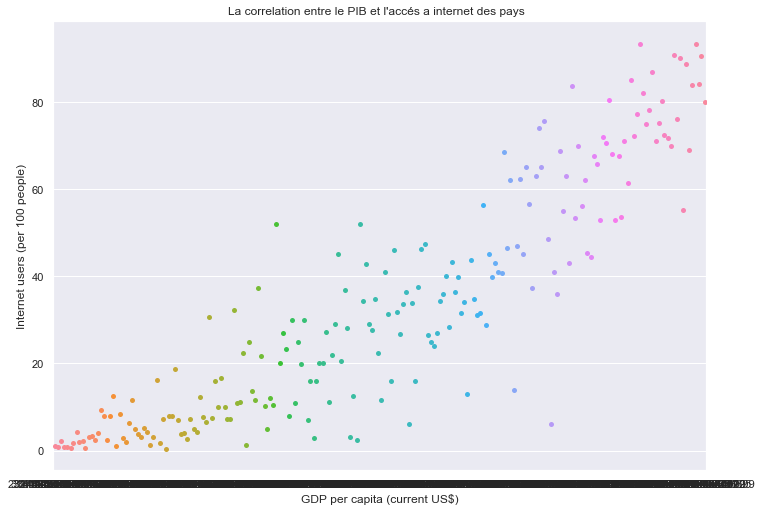

In [13]:
#Je selectionne les indicateurs interessants 

test = test.loc[test['Indicator Code'].isin(['SP.POP.TOTL', 'IT.NET.USER.P2','SP.SEC.TOTL.IN',
                                         'NY.GDP.PCAP.CD','SP.SEC.TOTL.IN','SE.SEC.ENRL.GC',
                                         'SP.POP.1524.TO.UN','PRJ.POP.ALL.3.MF','PRJ.POP.ALL.4.MF'])]



# j'ai effectuer un pivot pour avoir les indicateurs en colonnes 
test2 = test.pivot('Country Name',columns='Indicator Name', values='value')


#Comme j'ai 9 indicateurs je supprime les pays qui ont plus de 5 indicateurs de valeurs ( NaN)
test2 = test2.dropna(thresh=5)

#avec ce graphe on remarque une correlation trés forte entre le PIB et les utilisateurs d'internet, cela veut dire l'un de ces indicateurs nous suffit a lui seul, donc
# on supprime seulement les lignes ou les 2 indicateurs sont absents au meme temps car cela nous empeche completement d'etudier le pays 
sns.stripplot(x = 'GDP per capita (current US$)',y = 'Internet users (per 100 people)',data = test2)
plt.title("La correlation entre le PIB et l'accés a internet des pays  ")
#je supprime les lignes ou les 2 indicateurs (PIB et internet users) sont absents au meme temps ( Excellent)
test2.dropna(subset = ['GDP per capita (current US$)','Internet users (per 100 people)'],thresh=1,inplace=True)
test2.sample(5)
test2.isnull().sum()
                                


# filtrage des données selon nos besoins

E:\idm\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, "Repartition des pays en fonction de l'accés a internet")

Indicator Name,Country Name,"Enrolment in secondary general, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population of the official age for secondary education, both sexes (number)","Population, ages 15-24, total","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,Australia,1533093.0,51874.080482,76.00,1723145.0,2914315.0,22031750.0,5347.00,7689.98
1,Austria,449729.0,46858.043273,75.17,752268.0,1008570.0,8363404.0,1599.72,3441.63
2,Belgium,484368.0,44380.176633,75.00,761803.0,1263290.0,10895586.0,2733.01,2765.38
3,Bermuda,4418.0,88207.327560,84.21,5612.0,NaN,65124.0,NaN,NaN
4,Canada,NaN,47447.476024,80.30,2550477.0,4497200.0,34005274.0,14138.12,10276.79


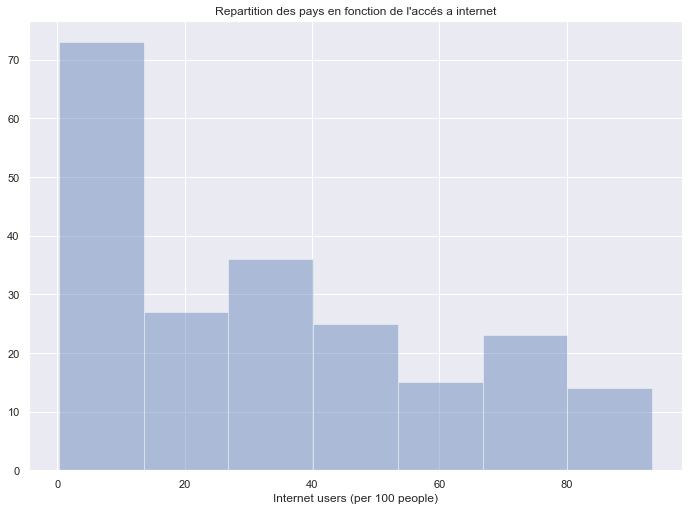

In [14]:
sns.distplot(test2['Internet users (per 100 people)'],kde=False)
# cet histograme nous indique qu'il ya assez de données ou les personnes ont accés a internet est suffisament elevé 
# L'accés a internet est une variable extrement importante pour notre cas on selectionne donc les pays qui ont 70/100 personnes au minimum qui
# ont accés a internet et peut etre meme plus
plt.title("Repartition des pays en fonction de l'accés a internet")
test3 = test2.loc[test2['Internet users (per 100 people)']>=75]
test3 = test3.reset_index()
test3.head(5)

Text(0.5, 1.0, 'Les pays en fonction de la population agées entre 15-24 ')

Text(0, 0.5, 'Pourcentage 15-24')

Text(0.5, 0, 'pays')

,value
count,19.000000
mean,12.541105
std,1.088506
min,9.867363
25%,11.972017
50%,12.235259
75%,13.226402
max,14.317696


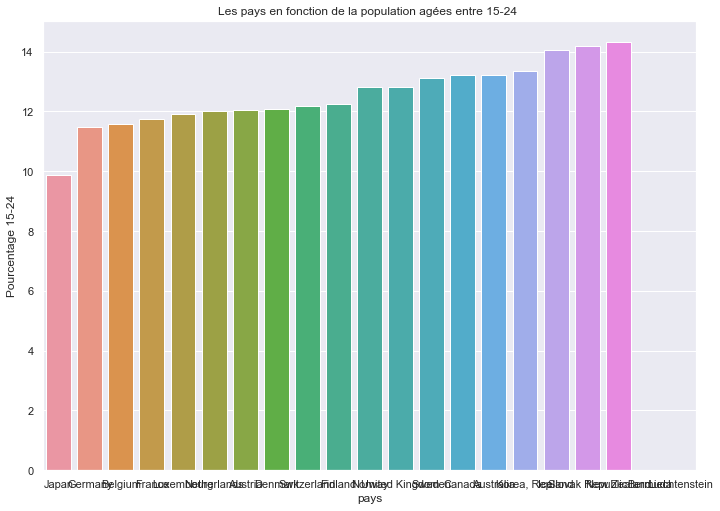

In [15]:
# Il reste a trier les pays en fonction du pourcentage de la population agées entre 15 et 24 ans 
percentage_1524 = (test3['Population, ages 15-24, total']*100)/test3['Population, total']

# percentage_1524
percentage = pd.concat([test3['Country Name'],percentage_1524],axis=1)
percentage = percentage.sort_values(by=0)
percentage = percentage.rename(columns = {0:'value'})
sns.barplot(x=percentage['Country Name'],y= percentage['value'])
plt.title("Les pays en fonction de la population agées entre 15-24 ")
plt.ylabel("Pourcentage 15-24")
plt.xlabel("pays")

#test statistiques pour voir en pourcetage combien de pays ont le gros pourcentage de population agées entre 15 et 24 ans 
percentage.describe()

# Selection des pays avec une population jeunes la plus elevée

In [16]:
#en se basant sur les statistiques descriptives Pour des raisons de marketing et de budget on decide de selectionner
#seulements les pays qui ont plus de 13% de population entre 15 et 24 ans 
test3['%_pop_1524'] = percentage_1524
test4 = test3.loc[test3['%_pop_1524']>13.2]


# Voici les pays qui avec le plus fort potentiels de clients ils ont ( l'argent, internet, population 15-24 >10% de la pop total)
test4['Country Name'].unique()

array(['Australia', 'Canada', 'Iceland', 'Korea, Rep.', 'New Zealand',
       'Slovak Republic'], dtype=object)

## Top 5 de pays avec le plus de potentiel de clients : Australia', 'Canada', 'Iceland', 'Korea', 'New Zealand', avec une population jeunes superieur a 13% de la population totale et un accés a internet depassant les 75% et ayant un PIB elevée pour nous assurer de leur capacité à financer la formation.
